In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('my_data.csv')

In [3]:
suffixes = ['TIP_Back_Control_Time', 'TIP_Clinch_Time', 'TIP_Control_Time', 'TIP_Ground_Control_Time', 'TIP_Ground_Time', 'TIP_Guard_Control_Time',
            'TIP_Half_Guard_Control_Time', 'TIP_Misc_Ground_Control_Time', 'TIP_Mount_Control_Time', 'TIP_Neutral_Time', 'TIP_Side_Control_Time']

suffixes.append('Strikes_Knock_Down_Landed')

for i in range(1, 6):
    for suffix in suffixes:
        r_col = f'R__Round{i}_{suffix}'
        b_col = f'B__Round{i}_{suffix}'

        if r_col in data.columns:
            data.drop(columns=r_col, inplace=True)
        if b_col in data.columns:
            data.drop(columns=b_col, inplace=True)


In [4]:
data.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2318.000000,2318.000000,2301.000000,2301.000000,2318.000000,2306.000000,1647.000000,1647.000000,1647.000000,1647.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2.391286,0.744607,31.776184,177.327249,2120.001726,73.699480,0.074681,1.103825,0.577413,3.852459,...,251.411111,33.644444,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704
std,2.539978,1.145596,4.165267,8.807620,705.089725,15.425347,0.305691,1.537946,1.049758,5.261864,...,197.588561,75.756504,100.516057,25.786323,13.039241,12.810181,39.171198,199.940529,20.941919,224.848078
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,172.000000,1910.250000,61.000000,0.000000,0.000000,0.000000,0.000000,...,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,178.000000
50%,2.000000,0.000000,31.000000,177.000000,2230.000000,70.000000,0.000000,1.000000,0.000000,2.000000,...,222.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,258.500000,0.000000,296.500000
75%,4.000000,1.000000,35.000000,182.000000,2709.000000,84.000000,0.000000,2.000000,1.000000,5.000000,...,299.000000,34.000000,98.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,364.000000
max,14.000000,10.000000,48.000000,213.000000,3196.000000,120.000000,3.000000,13.000000,8.000000,47.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [5]:
data.drop(['B_ID','R_ID','Event_ID',
     'Fight_ID', 'BStreak','Last_round','Max_round'], axis=1, inplace=True)

''' 'BPrev','B_Age','B_Height','B_Weight','B_Location','B_HomeTown','RPrev','R_Age','R_Height',
'R_Weight','R_Location','R_HomeTown','Date','winby','winner' '''

" 'BPrev','B_Age','B_Height','B_Weight','B_Location','B_HomeTown','RPrev','R_Age','R_Height',\n'R_Weight','R_Location','R_HomeTown','Date','winby','winner' "

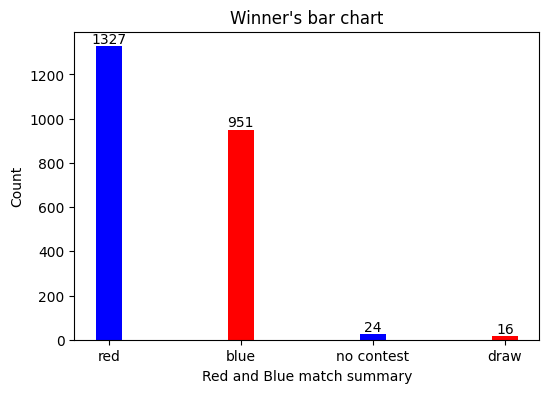

In [6]:
sales_counts =data['winner'].value_counts()
custom_bar_width = 0.2
x = range(len(sales_counts))
plt.figure(figsize=(6, 4))
plt.bar(x, sales_counts.values, width=custom_bar_width, color=['blue', 'red'])
plt.xlabel('Red and Blue match summary')
plt.ylabel('Count')
plt.title("Winner's bar chart")
for i, count in enumerate(sales_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.xticks(x, sales_counts.index)
plt.show()


In [7]:
data.drop(data.filter(regex='B__Round[1-5]_Grappling_(Reversals_Landed|Standups_Landed)').columns, axis=1, inplace=True)

data.drop(data.filter(regex='Round[1-5]_Grappling_Reversals_Landed').columns, axis=1, inplace=True)

data.drop(data.filter(regex='Round[1-5]_Grappling_Standups_Landed').columns, axis=1, inplace=True)


In [8]:
data['B_Age']=data['B_Age'].fillna(np.mean(data['B_Age']))
data['B_Height']=data['B_Height'].fillna(np.mean(data['B_Height']))
data['R_Age']=data['R_Age'].fillna(np.mean(data['R_Age']))
data['R_Height']=data['R_Height'].fillna(np.mean(data['R_Height']))

In [9]:
unique_values = data['winner'].unique()
print(unique_values)


['blue' 'red' 'no contest' 'draw']


In [10]:
unique_values = data['winby'].unique()
print(unique_values)


['DEC' 'KO/TKO' 'SUB' nan]


In [11]:
data['winby'].fillna(0, inplace=True)
data['winner'].fillna(0, inplace=True)

In [12]:
winby_mapping={'SUB':1,'DEC':2,'KO/TKO':3}
data['winby']=data['winby'].map(winby_mapping)
winner_mapping={'red':1,'blue':2,'no contest':3,'draw':4}
data['winner']=data['winner'].map(winner_mapping)

In [13]:
unique_values = data['winner'].unique()
print(unique_values)


[2 1 3 4]


In [14]:
unique_values = data['winby'].unique()
print(unique_values)


[ 2.  3.  1. nan]


In [15]:
data.fillna(value=0,inplace=True)
data.describe(include='O')

,B_HomeTown,B_Location,B_Name,Date,R_HomeTown,R_Location,R_Name
count,2318,2318,2318,2318,2318,2318,2318
unique,725,568,949,382,653,505,842
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Kevin Lee,08-10-2018,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Donald Cerrone
freq,46,58,11,76,65,99,14


In [16]:
numerical_columns = data.select_dtypes(include=['number'])
outlier_threshold = 4
outliers_count = {}

for column in numerical_columns:
    Z_scores = (data[column] - data[column].mean()) / data[column].std()
    outliers = np.abs(Z_scores) > outlier_threshold
    data = data[~outliers]
    outliers_count[column] = outliers.sum()

In [17]:
numerical_columns.columns

Index(['BPrev', 'B_Age', 'B_Height', 'B_Weight',
       'B__Round1_Grappling_Submissions_Attempts',
       'B__Round1_Grappling_Takedowns_Attempts',
       'B__Round1_Grappling_Takedowns_Landed',
       'B__Round1_Strikes_Body Significant Strikes_Attempts',
       'B__Round1_Strikes_Body Significant Strikes_Landed',
       'B__Round1_Strikes_Body Total Strikes_Attempts',
       ...
       'R__Round5_TIP_Ground Time', 'R__Round5_TIP_Guard Control Time',
       'R__Round5_TIP_Half Guard Control Time',
       'R__Round5_TIP_Misc. Ground Control Time',
       'R__Round5_TIP_Mount Control Time', 'R__Round5_TIP_Neutral Time',
       'R__Round5_TIP_Side Control Time', 'R__Round5_TIP_Standing Time',
       'winby', 'winner'],
      dtype='object', length=860)

In [18]:
for column, count in outliers_count.items():
    print(f'{column}: {count}')

BPrev: 5
B_Age: 0
B_Height: 4
B_Weight: 12
B__Round1_Grappling_Submissions_Attempts: 14
B__Round1_Grappling_Takedowns_Attempts: 32
B__Round1_Grappling_Takedowns_Landed: 21
B__Round1_Strikes_Body Significant Strikes_Attempts: 24
B__Round1_Strikes_Body Significant Strikes_Landed: 14
B__Round1_Strikes_Body Total Strikes_Attempts: 7
B__Round1_Strikes_Body Total Strikes_Landed: 14
B__Round1_Strikes_Clinch Body Strikes_Attempts: 26
B__Round1_Strikes_Clinch Body Strikes_Landed: 20
B__Round1_Strikes_Clinch Head Strikes_Attempts: 23
B__Round1_Strikes_Clinch Head Strikes_Landed: 23
B__Round1_Strikes_Clinch Leg Strikes_Attempts: 41
B__Round1_Strikes_Clinch Leg Strikes_Landed: 42
B__Round1_Strikes_Clinch Significant Kicks_Attempts: 21
B__Round1_Strikes_Clinch Significant Kicks_Landed: 24
B__Round1_Strikes_Clinch Significant Punches_Attempts: 39
B__Round1_Strikes_Clinch Significant Punches_Landed: 57
B__Round1_Strikes_Clinch Significant Strikes_Attempts: 10
B__Round1_Strikes_Clinch Significant Stri

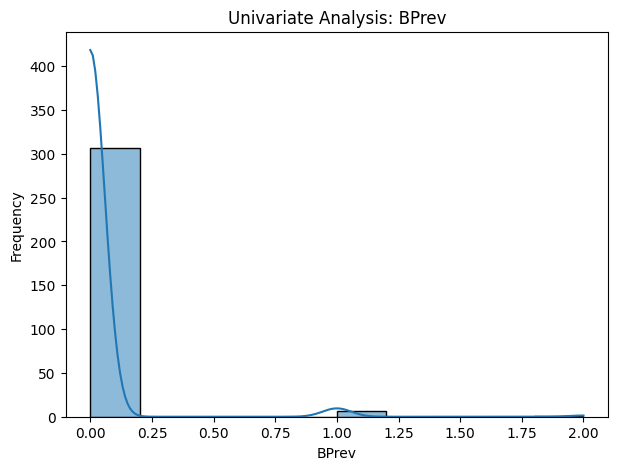

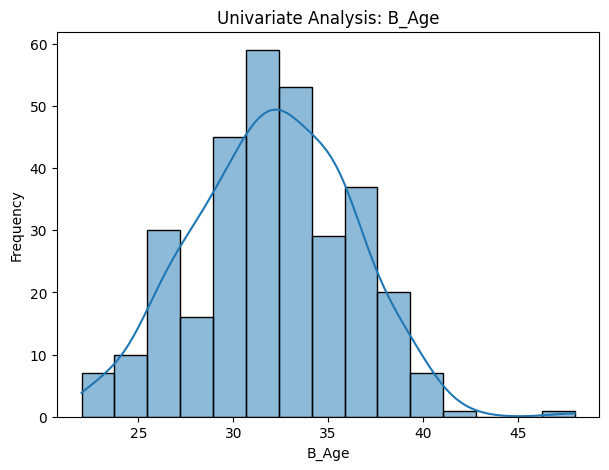

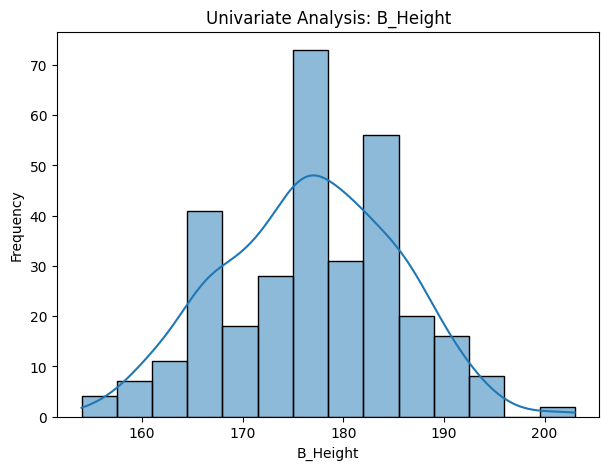

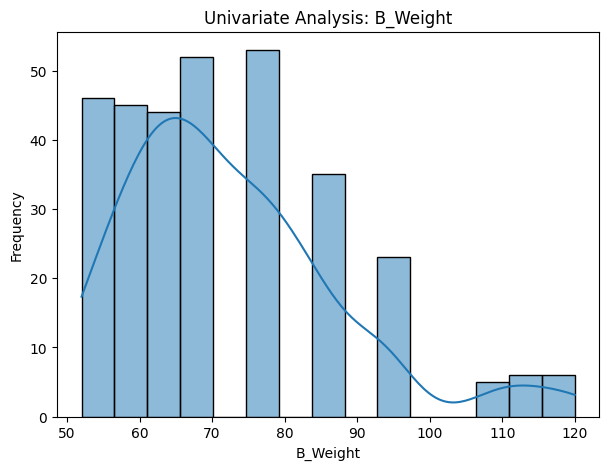

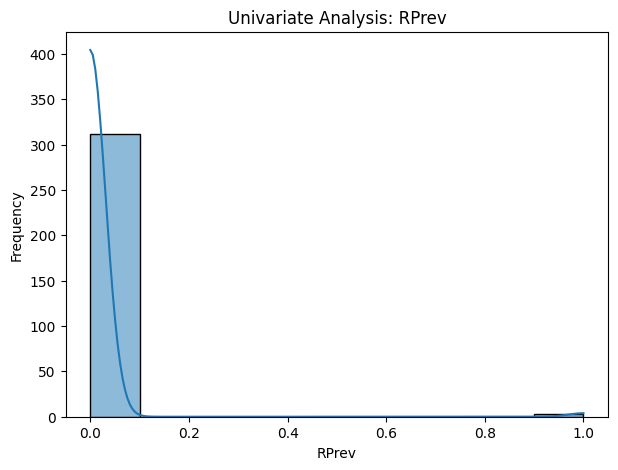

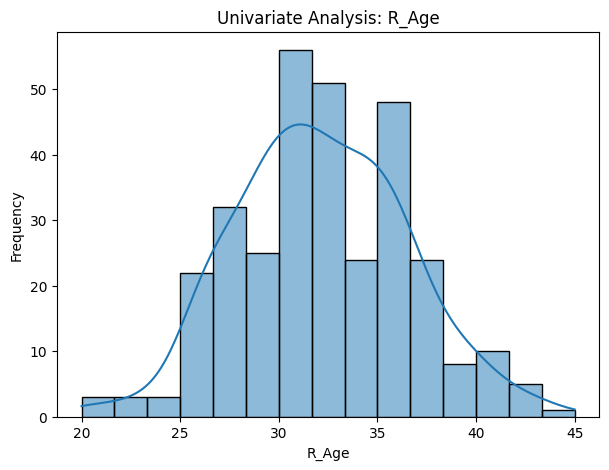

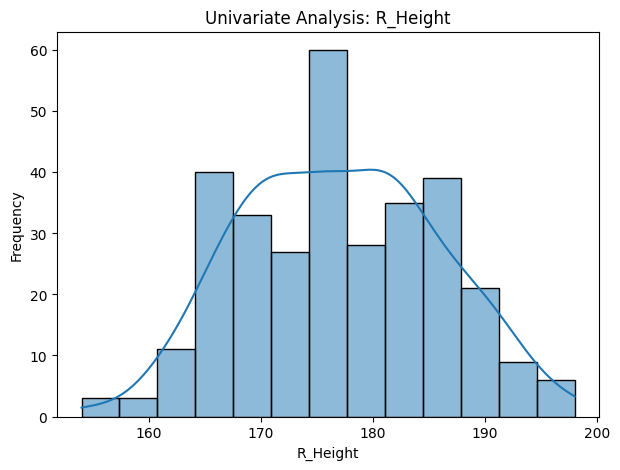

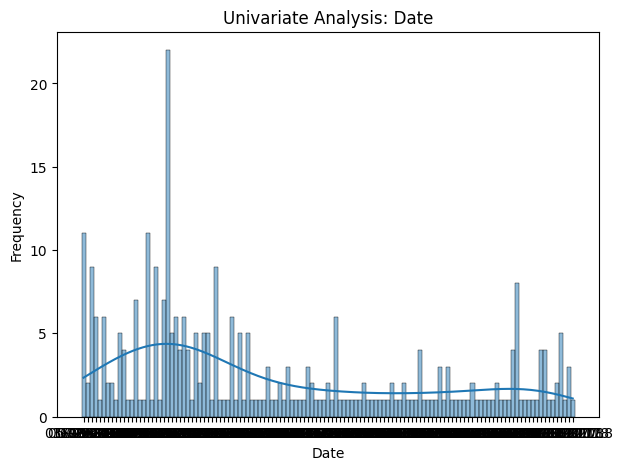

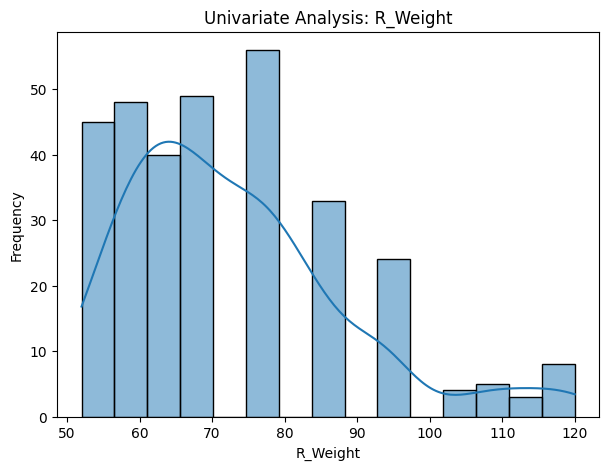

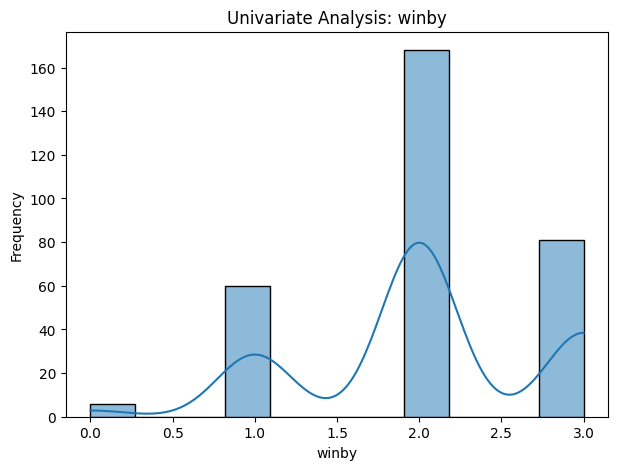

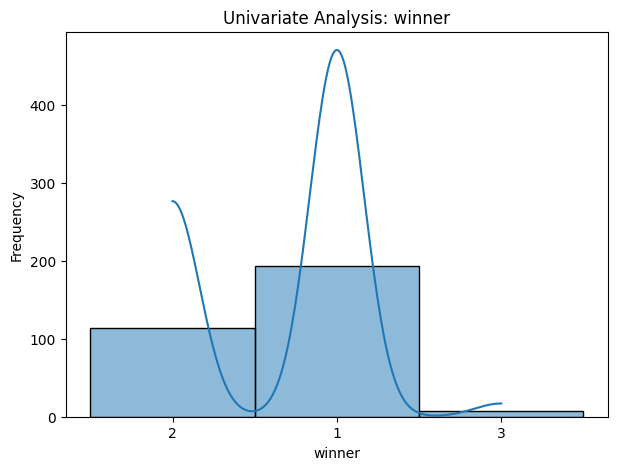

In [19]:
data[column] = data[column].astype(str)
columns = ['BPrev','B_Age','B_Height','B_Weight','RPrev','R_Age','R_Height','Date','R_Weight','winby','winner']
for column in columns:
    plt.figure(figsize=(7,5))
    sns.histplot(data[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Univariate Analysis: {column}')
    plt.show()


In [20]:
data.isnull().sum()

BPrev                              0
B_Age                              0
B_Height                           0
B_HomeTown                         0
B_Location                         0
                                  ..
R__Round5_TIP_Neutral Time         0
R__Round5_TIP_Side Control Time    0
R__Round5_TIP_Standing Time        0
winby                              0
winner                             0
Length: 867, dtype: int64

In [21]:
null_columns = data.columns[data.isnull().any()]
null_counts = data[null_columns].isnull().sum()

if not null_columns.empty:
    for col, count in zip(null_counts.index, null_counts):
        print(f"Column '{col}' has {count} null values.")
else:
    print("No columns have null values.")


No columns have null values.


In [22]:
'''for column1 in data.columns:
    for column2 in data.columns:
        if column1 == column2 or not pd.api.types.is_numeric_dtype(data[column1]) or not pd.api.types.is_numeric_dtype(data[column2]):
            continue
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=data[column1], y=data[column2], data=data)
        plt.xlabel(column1)  # It should be 'xlabel', not 'xlable'
        plt.ylabel(column2)  # It should be 'ylabel', not 'ylable'
        plt.title(f'Bivariate Analysis: {column1} vs {column2}')
        plt.show()'''


"for column1 in data.columns:\n    for column2 in data.columns:\n        if column1 == column2 or not pd.api.types.is_numeric_dtype(data[column1]) or not pd.api.types.is_numeric_dtype(data[column2]):\n            continue\n        plt.figure(figsize=(8, 6))\n        sns.scatterplot(x=data[column1], y=data[column2], data=data)\n        plt.xlabel(column1)  # It should be 'xlabel', not 'xlable'\n        plt.ylabel(column2)  # It should be 'ylabel', not 'ylable'\n        plt.title(f'Bivariate Analysis: {column1} vs {column2}')\n        plt.show()"

<ipython-input-23-97e30c5856d7>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data[columns].corr()


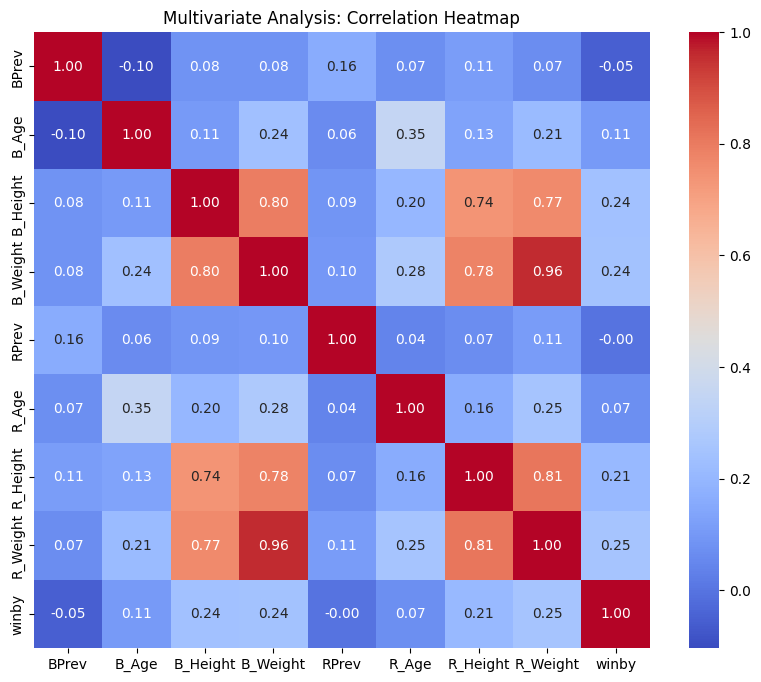

In [23]:
columns = ['BPrev','B_Age','B_Height','B_Weight','B_Location','B_HomeTown','RPrev','R_Age','R_Height',
'R_Weight','R_Location','R_HomeTown','Date','winby','winner']
correlation_matrix = data[columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Multivariate Analysis: Correlation Heatmap')
plt.show()


In [24]:
columns_to_keep = ['BPrev', 'B_Age', 'B_Height', 'B_Weight', 'RPrev', 'R_Age', 'R_Height', 'R_Weight', 'winby', 'winner']

data = data.loc[:, columns_to_keep]

In [25]:
data.head()

,BPrev,B_Age,B_Height,B_Weight,RPrev,R_Age,R_Height,R_Weight,winby,winner
0,0,38.0,193.0,120.0,0,39.0,190.0,119.0,2.0,2
1,0,36.0,172.0,65.0,0,32.0,170.0,65.0,2.0,1
2,0,39.0,167.0,61.0,0,31.0,167.0,61.0,3.0,1
3,0,33.0,167.0,56.0,0,37.0,160.0,56.0,2.0,1
4,0,36.0,185.0,84.0,0,37.0,182.0,84.0,2.0,1


In [26]:
data.dtypes

BPrev         int64
B_Age       float64
B_Height    float64
B_Weight    float64
RPrev         int64
R_Age       float64
R_Height    float64
R_Weight    float64
winby       float64
winner       object
dtype: object

In [27]:
print(data['winby'])

0       2.0
1       2.0
2       3.0
3       2.0
4       2.0
       ... 
2236    2.0
2288    0.0
2290    0.0
2291    0.0
2292    0.0
Name: winby, Length: 315, dtype: float64


In [28]:
# Import all required Libraries:

import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier
from imblearn.over_sampling import SMOTE
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingClassifier
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

In [29]:
data.shape

(315, 10)

In [30]:
data.columns

Index(['BPrev', 'B_Age', 'B_Height', 'B_Weight', 'RPrev', 'R_Age', 'R_Height',
       'R_Weight', 'winby', 'winner'],
      dtype='object')

In [31]:
X = data.iloc[:, data.columns != 'label']
y = data.iloc[:, data.columns == 'label']

In [32]:
from sklearn.model_selection import train_test_split

# Step 1: Separate X (features) and y (target)
X = data.drop(['winner'], axis=1)  # Exclude the 'winner' column as it's your target variable
y = data['winner']

# Step 2: Split data into a training set and a test set (80% train, 20% test)
X_train, test_data, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

# Step 3: Split the training set into a training set and a cross-validation set (80% train, 20% cross-validation)
train_df, cv_df, y_train, y_cv = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)


In [33]:
print('Number of data points in train data:', X_train.shape[0])
print('Number of data points in test data:', test_data.shape[0])
print('Number of data points in cross validation data:', cv_df.shape[0])


Number of data points in train data: 252
Number of data points in test data: 63
Number of data points in cross validation data: 51


In [34]:
test_data.head(2)

,BPrev,B_Age,B_Height,B_Weight,RPrev,R_Age,R_Height,R_Weight,winby
1285,0,30.0,193.0,109.0,0,28.0,193.0,113.0,2.0
132,0,31.0,190.0,93.0,0,38.0,185.0,93.0,2.0


In [35]:
y_test.head(2)

1285    2
132     2
Name: winner, dtype: object

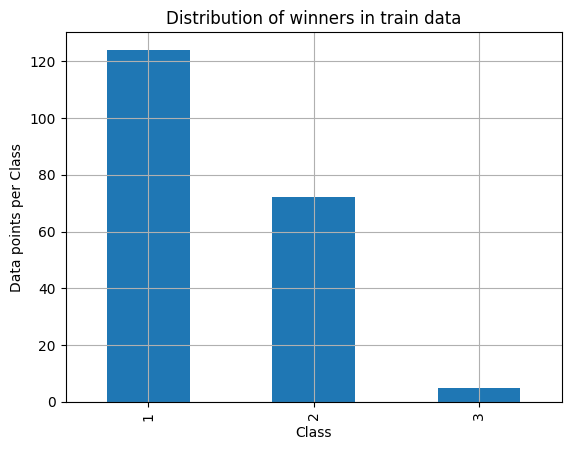

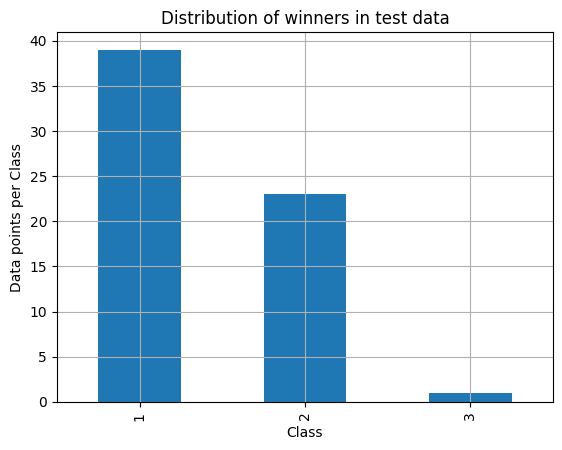

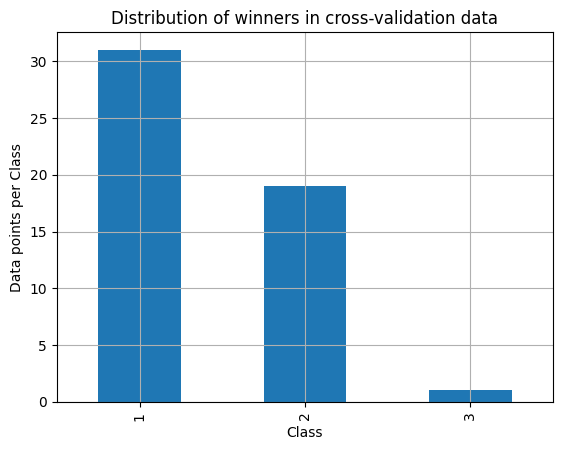

In [36]:
# Train Data
train_class_distribution = y_train.value_counts().sort_index()
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of winners in train data')
plt.grid()
plt.show()

# Test Data
test_class_distribution = y_test.value_counts().sort_index()
my_colors = 'rgbkymc'
test_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of winners in test data')
plt.grid()
plt.show()

# Cross Validation Data
cv_class_distribution = y_cv.value_counts().sort_index()
my_colors = 'rgbkymc'
cv_class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of winners in cross-validation data')
plt.grid()
plt.show()


In [37]:
X_train

,BPrev,B_Age,B_Height,B_Weight,RPrev,R_Age,R_Height,R_Weight,winby
255,0,33.0,182.0,84.0,0,37.0,180.0,84.0,3.0
16,0,29.0,172.0,65.0,0,28.0,177.0,70.0,1.0
71,0,35.0,175.0,65.0,0,33.0,170.0,65.0,2.0
498,0,39.0,160.0,52.0,0,30.0,157.0,52.0,1.0
1771,0,29.0,180.0,77.0,0,26.0,172.0,77.0,2.0
...,...,...,...,...,...,...,...,...,...
224,0,30.0,177.0,77.0,0,33.0,175.0,70.0,2.0
365,0,35.0,177.0,77.0,0,32.0,182.0,77.0,3.0
916,0,28.0,160.0,52.0,0,27.0,162.0,52.0,3.0
1764,0,32.0,180.0,65.0,0,33.0,177.0,65.0,3.0


In [38]:
'''from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Select only the numeric columns in your DataFrame
numeric_columns = X_train.select_dtypes(include=['number'])

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train[numeric_columns.columns])
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns.columns)

# Transform the test data and cross-validation data using the scaler fitted to the training data
X_test_scaled = scaler.transform(X_test[numeric_columns.columns])
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns.columns)

X_val_scaled = scaler.transform(X_val[numeric_columns.columns])
X_val_scaled = pd.DataFrame(X_val_scaled, columns=numeric_columns.columns)
'''

"from sklearn.preprocessing import StandardScaler\n\nscaler = StandardScaler()\n\n# Select only the numeric columns in your DataFrame\nnumeric_columns = X_train.select_dtypes(include=['number'])\n\n# Fit and transform the training data\nX_train_scaled = scaler.fit_transform(X_train[numeric_columns.columns])\nX_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_columns.columns)\n\n# Transform the test data and cross-validation data using the scaler fitted to the training data\nX_test_scaled = scaler.transform(X_test[numeric_columns.columns])\nX_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_columns.columns)\n\nX_val_scaled = scaler.transform(X_val[numeric_columns.columns])\nX_val_scaled = pd.DataFrame(X_val_scaled, columns=numeric_columns.columns)\n"

In [39]:
data.describe()

,BPrev,B_Age,B_Height,B_Weight,RPrev,R_Age,R_Height,R_Weight,winby
count,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000,315.000000
mean,0.028571,32.085004,176.704704,72.555556,0.009524,32.132990,176.997257,73.009524,2.028571
std,0.184967,4.124177,8.642742,14.781398,0.097279,4.330247,8.775149,15.070003,0.724333
min,0.000000,22.000000,154.000000,52.000000,0.000000,20.000000,154.000000,52.000000,0.000000
25%,0.000000,29.000000,170.000000,61.000000,0.000000,29.000000,170.000000,61.000000,2.000000
50%,0.000000,32.000000,177.000000,70.000000,0.000000,32.000000,177.000000,70.000000,2.000000
75%,0.000000,35.000000,182.000000,77.000000,0.000000,35.000000,182.000000,77.000000,3.000000
max,2.000000,48.000000,203.000000,120.000000,1.000000,45.000000,198.000000,120.000000,3.000000


In [40]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j

    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column

    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1

    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]]

    labels = [0,1,2]
    # representing A in heatmap format
    print("-"*20, "Confusion matrix", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    print("-"*20, "Precision matrix (Columm Sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

    # representing B in heatmap format
    print("-"*20, "Recall matrix (Row sum=1)", "-"*20)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

Log loss on Cross Validation Data using Random Model 1.86698590613874
Log loss on Test Data using Random Model 1.8836883454665527
-------------------- Confusion matrix --------------------


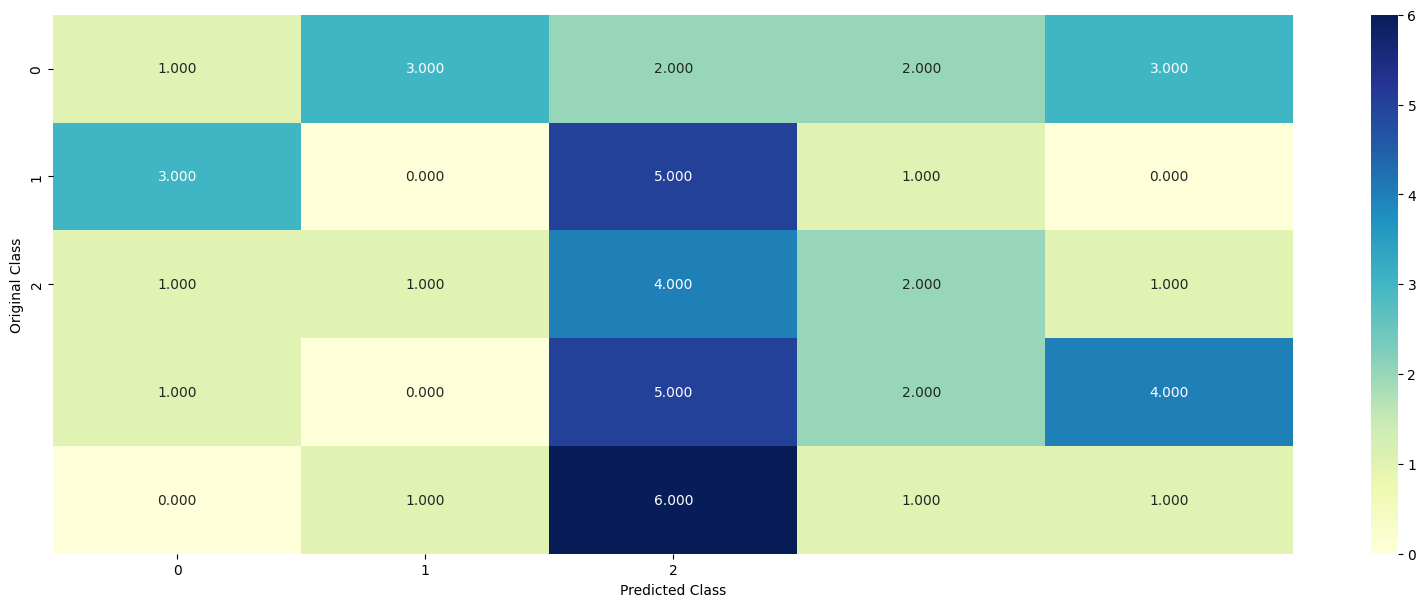

-------------------- Precision matrix (Columm Sum=1) --------------------


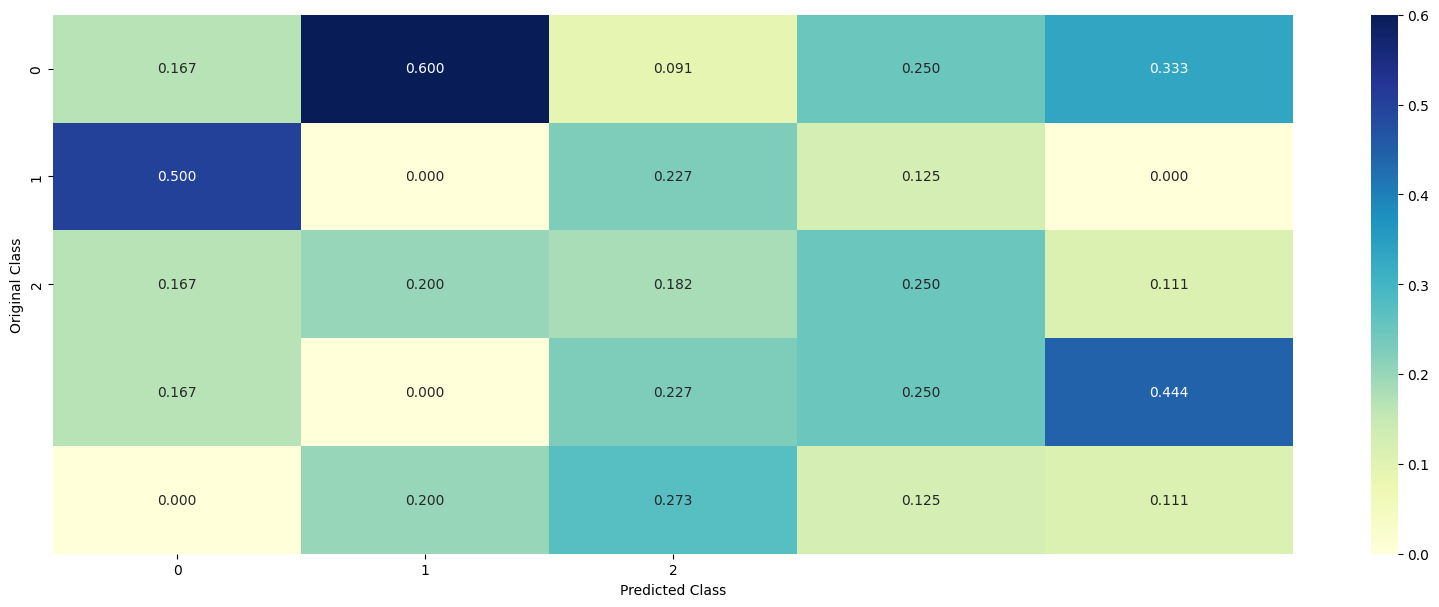

-------------------- Recall matrix (Row sum=1) --------------------


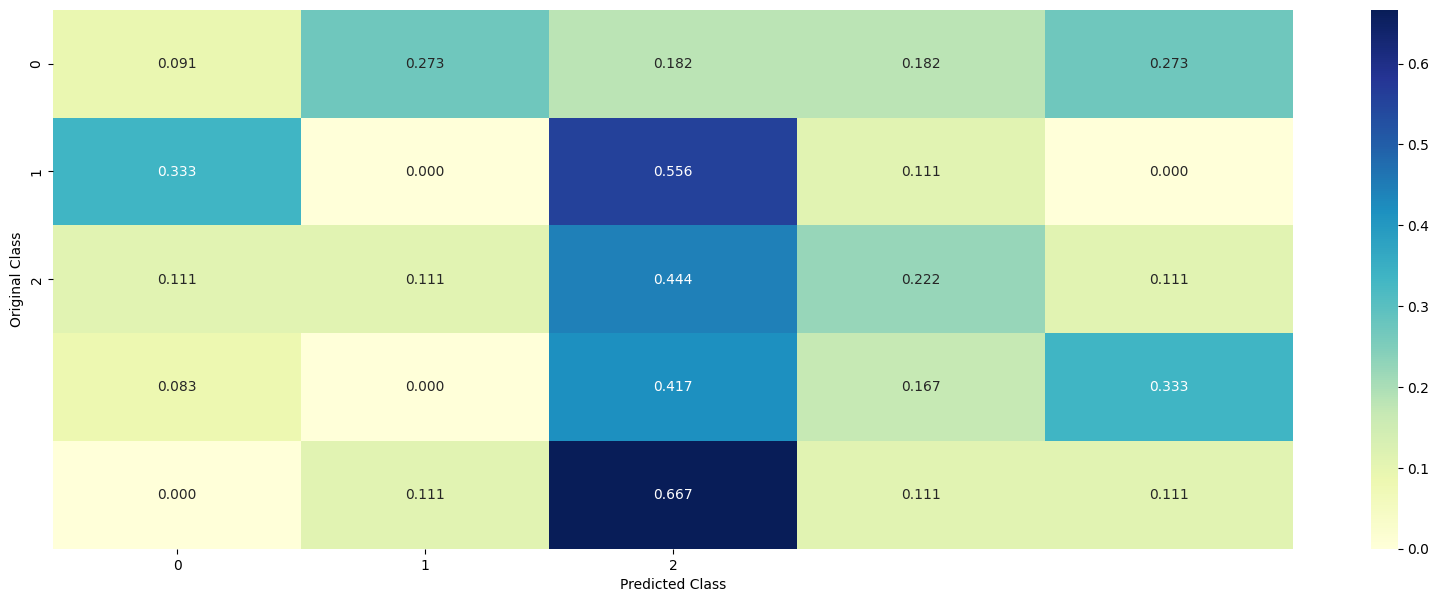

In [41]:
import numpy as np
from sklearn.metrics import log_loss

# Example data (you should replace this with your actual data)
cv_data = np.random.rand(100, 5)  # Replace with your cross-validation data
y_cv = np.random.randint(5, size=100)  # Replace with your cross-validation labels
test_data = np.random.rand(50, 5)  # Replace with your test data
y_test = np.random.randint(5, size=50)  # Replace with your test labels

# Calculate the size of test and CV data
test_data_len = test_data.shape[0]
cv_data_len = cv_data.shape[0]

# Generate random probabilities for CV data
cv_predicted_y = np.zeros((cv_data_len, 5))
for i in range(cv_data_len):
    rand_probs = np.random.rand(1, 5)
    cv_predicted_y[i] = ((rand_probs / sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation Data using Random Model", log_loss(y_cv, cv_predicted_y, eps=1e-15))

# Generate random probabilities for test data
test_predicted_y = np.zeros((test_data_len, 5))
for i in range(test_data_len):
    rand_probs = np.random.rand(1, 5)
    test_predicted_y[i] = ((rand_probs / sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model", log_loss(y_test, test_predicted_y, eps=1e-15))

# Convert predicted probabilities to predicted classes by choosing the class with the highest probability
predicted_y = np.argmax(test_predicted_y, axis=1)

# Now you can use the 'plot_confusion_matrix' function with your data
plot_confusion_matrix(y_test, predicted_y)


In [42]:
#Data preparation for ML models.

#Misc. functionns for ML models


def predict_and_plot_confusion_matrix(train_x, train_y,test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [43]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset (assuming you have a DataFrame named 'data')
# Preprocess the data (handle missing values, if any)

# Assuming 'winner' is your target variable
X = data.drop(['winner'], axis=1)
y = data['winner']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize k-NN classifier
k = 5  # Choose an appropriate value of k
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the k-NN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = knn_classifier.predict(X_val)

# Evaluate the model's performance on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)

print("Validation Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)

# Make predictions on the test set
y_test_pred = knn_classifier.predict(X_test)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print("Test Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)


Validation Accuracy: 57.45%
Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.74      0.70        31
           2       0.33      0.29      0.31        14
           3       0.00      0.00      0.00         2

    accuracy                           0.57        47
   macro avg       0.33      0.34      0.33        47
weighted avg       0.53      0.57      0.55        47

Test Accuracy: 43.75%
Classification Report:
               precision    recall  f1-score   support

           1       0.49      0.65      0.56        26
           2       0.31      0.18      0.23        22

    accuracy                           0.44        48
   macro avg       0.40      0.42      0.39        48
weighted avg       0.40      0.44      0.41        48



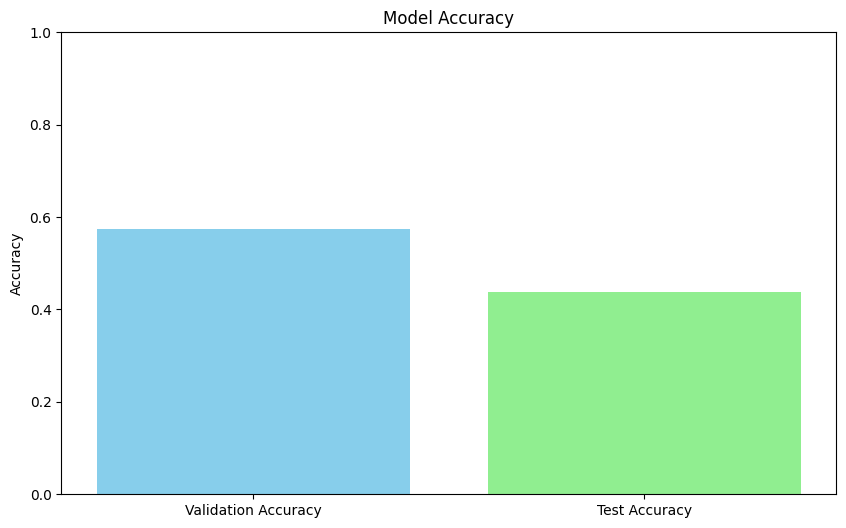

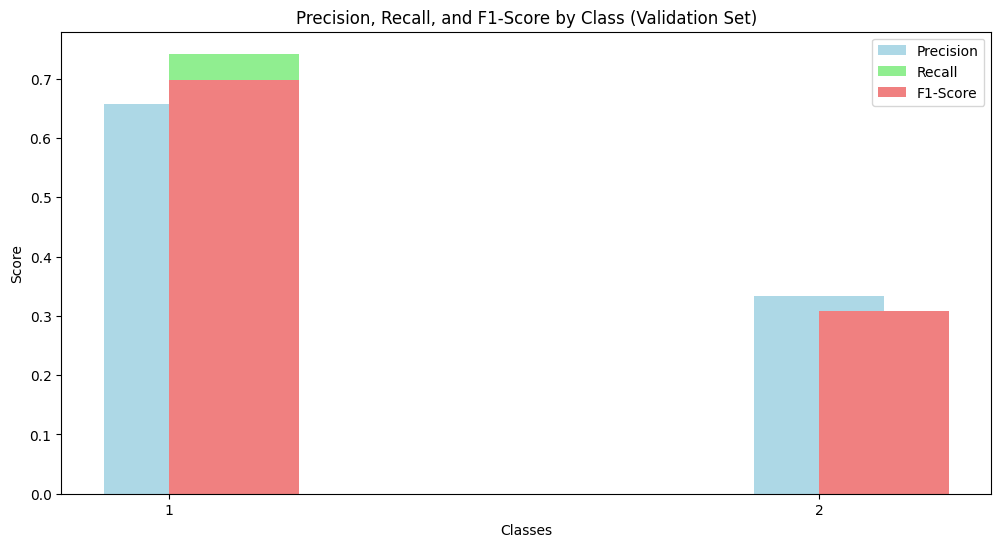

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load your dataset (assuming you have a DataFrame named 'data')
# Preprocess the data (handle missing values, if any)

# Assuming 'winner' is your target variable
X = data.drop(['winner'], axis=1)
y = data['winner']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize k-NN classifier
k = 5  # Choose an appropriate value of k
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the k-NN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = knn_classifier.predict(X_val)

# Evaluate the model's performance on the validation set
accuracy_val = accuracy_score(y_val, y_val_pred)
report_val = classification_report(y_val, y_val_pred, output_dict=True)

# Make predictions on the test set
y_test_pred = knn_classifier.predict(X_test)

# Evaluate the model's performance on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
report_test = classification_report(y_test, y_test_pred, output_dict=True)

# Bar chart for accuracy
labels = ['Validation Accuracy', 'Test Accuracy']
accuracies = [accuracy_val, accuracy_test]

plt.figure(figsize=(10, 6))
plt.bar(labels, accuracies, color=['skyblue', 'lightgreen'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1
plt.show()

# Bar chart for precision, recall, and F1-score for each class in the classification report
classes = list(report_test.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

precision = [report_val[c]['precision'] for c in classes]
recall = [report_val[c]['recall'] for c in classes]
f1 = [report_val[c]['f1-score'] for c in classes]

x = range(len(classes))

plt.figure(figsize=(12, 6))
plt.bar(x, precision, width=0.2, label='Precision', align='center', color='lightblue')
plt.bar(x, recall, width=0.2, label='Recall', align='edge', color='lightgreen')
plt.bar(x, f1, width=0.2, label='F1-Score', align='edge', color='lightcoral')

plt.xlabel('Classes')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1-Score by Class (Validation Set)')
plt.xticks(x, classes)
plt.legend(loc='best')
plt.show()


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Assuming 'winner' is your target variable
X = data.drop(['winner'], axis=1)
y = data['winner']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Initialize k-NN classifier
k = 5  # Choose an appropriate value of k
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Train the k-NN classifier
knn_classifier.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = knn_classifier.predict(X_val)

# Evaluate the model's performance on the validation set
accuracy = accuracy_score(y_val, y_val_pred)
report = classification_report(y_val, y_val_pred)

print("Validation Accuracy: {:.2f}%".format(accuracy * 100))
print("Classification Report:\n", report)


Validation Accuracy: 57.45%
Classification Report:
               precision    recall  f1-score   support

           1       0.66      0.74      0.70        31
           2       0.33      0.29      0.31        14
           3       0.00      0.00      0.00         2

    accuracy                           0.57        47
   macro avg       0.33      0.34      0.33        47
weighted avg       0.53      0.57      0.55        47



In [47]:
# Assuming you have a variable `best_k` with the best value for k
best_k = 3  # Replace with your best value

# Initialize the KNN classifier with the best hyperparameters
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)

# Train the KNN classifier with the best hyperparameters on the entire training data
best_knn_classifier.fit(X_train, y_train)

# Make predictions on the test set using the best KNN classifier
y_test_pred = best_knn_classifier.predict(X_test)

# Evaluate the model's performance on the test set
accuracy = accuracy_score(y_test, y_test_pred)
report = classification_report(y_test, y_test_pred)

print("Test Accuracy with Best K: {:.2f}%".format(accuracy * 100))
print("Classification Report with Best K:\n", report)


Test Accuracy with Best K: 35.42%
Classification Report with Best K:
               precision    recall  f1-score   support

           1       0.42      0.50      0.46        26
           2       0.24      0.18      0.21        22

    accuracy                           0.35        48
   macro avg       0.33      0.34      0.33        48
weighted avg       0.33      0.35      0.34        48



for alpha = 1e-06
Log Loss: 0.7779105670668713
for alpha = 1e-05
Log Loss: 0.7794505698366595
for alpha = 0.0001
Log Loss: 0.7854564845939201
for alpha = 0.001
Log Loss: 0.7930159735787244
for alpha = 0.01
Log Loss: 0.7795317780861185
for alpha = 0.1
Log Loss: 0.7781597651475772
for alpha = 1
Log Loss: 0.7809447671775951
for alpha = 10
Log Loss: 0.7847371741170969
for alpha = 100
Log Loss: 0.7805220954084666


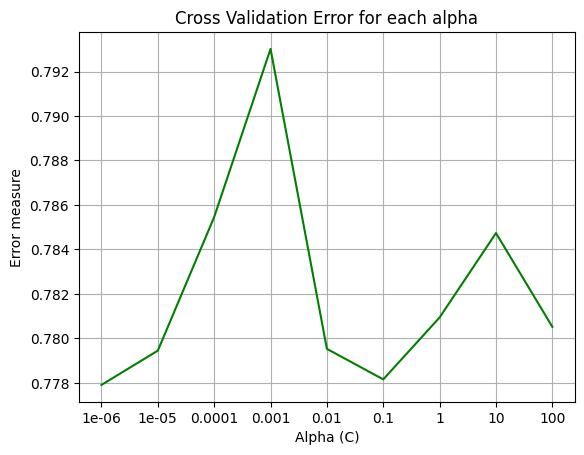

For best alpha = 1e-06 The train log loss is: 0.7509002297876849
For best alpha = 1e-06 The validation log loss is: 0.7779105670668713
For best alpha = 1e-06 The test log loss is: 0.7454313123886722
Test Set Classification Report:
               precision    recall  f1-score   support

           1       0.54      1.00      0.70        26
           2       0.00      0.00      0.00        22

    accuracy                           0.54        48
   macro avg       0.27      0.50      0.35        48
weighted avg       0.29      0.54      0.38        48



In [48]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.calibration import CalibratedClassifierCV
import numpy as np
import matplotlib.pyplot as plt

# Load your dataset (assuming you have a DataFrame named 'data')
# Preprocess the data (handle missing values, if any)

# Assuming 'winner' is your target variable
X = data.drop(['winner'], axis=1)
y = data['winner']

# Split the data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Hyperparameter values
alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []

for i in alpha:
    print("for alpha =", i)

    # Initialize the logistic regression classifier with class balancing, L2 regularization, and log loss
    clf = LogisticRegression(class_weight='balanced', C=i, penalty='l2', random_state=42, solver='liblinear')

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Calibrate the classifier
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)

    # Predict probabilities on the validation data
    sig_clf_probs = sig_clf.predict_proba(X_val)

    # Calculate and append log loss to the list
    cv_log_error_array.append(log_loss(y_val, sig_clf_probs, labels=clf.classes_, eps=1e-15))

    # To avoid rounding error while multiplying probabilities, we use log-probability estimates
    print("Log Loss:", log_loss(y_val, sig_clf_probs))

# Plot the cross-validation error for each alpha
fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array, c='g')
ax.set_xticks(range(-6, 3))
ax.set_xticklabels([str(10 ** x) for x in range(-6, 3)])
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha (C)")
plt.ylabel("Error measure")
plt.show()

# Find the best alpha based on the minimum cross-validation error
best_alpha = alpha[np.argmin(cv_log_error_array)]
clf = LogisticRegression(class_weight='balanced', C=best_alpha, penalty='l2', random_state=42, solver='liblinear')
clf.fit(X_train, y_train)

# Calibrate the classifier
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

# Predict probabilities on the training data
predict_y = sig_clf.predict_proba(X_train)
print('For best alpha =', best_alpha, "The train log loss is:", log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))

# Predict probabilities on the validation data
predict_y = sig_clf.predict_proba(X_val)
print('For best alpha =', best_alpha, "The validation log loss is:", log_loss(y_val, predict_y, labels=clf.classes_, eps=1e-15))

# Predict probabilities on the test data
predict_y = sig_clf.predict_proba(X_test)
print('For best alpha =', best_alpha, "The test log loss is:", log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

# Display the classification report for the test set
y_test_pred = sig_clf.predict(X_test)
report = classification_report(y_test, y_test_pred)
print("Test Set Classification Report:\n", report)


Test Set Classification Report:
               precision    recall  f1-score   support

           1       0.54      1.00      0.70        26
           2       0.00      0.00      0.00        22

    accuracy                           0.54        48
   macro avg       0.27      0.50      0.35        48
weighted avg       0.29      0.54      0.38        48



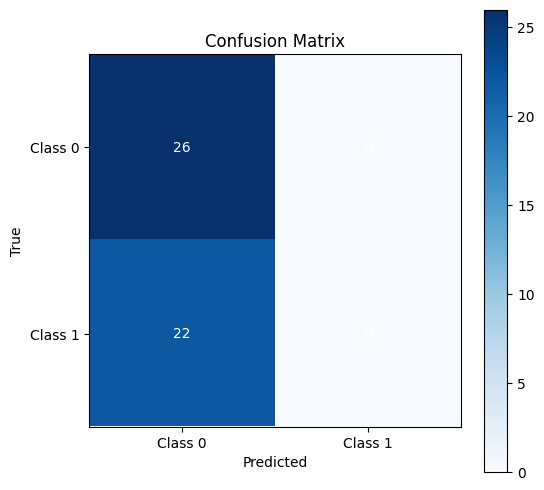

In [49]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Initialize the logistic regression classifier with the best hyperparameters
clf = LogisticRegression(class_weight='balanced', C=best_alpha, penalty='l2', random_state=42, solver='liblinear')
clf.fit(X_train, y_train)

# Calibrate the classifier
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

# Predict probabilities on the test data
predict_y = sig_clf.predict_proba(X_test)

# Get the predicted labels
y_test_pred = sig_clf.predict(X_test)

# Display the classification report for the test set
report = classification_report(y_test, y_test_pred)
print("Test Set Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion Matrix")
plt.colorbar()

# Create a list of class labels (replace '0' and '1' with your actual class labels)
classes = ['Class 0', 'Class 1']

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha="center", va="center", color="white")

plt.show()


n_estimators = 50 max_depth = 10
Log Loss: 0.775628264509109
n_estimators = 50 max_depth = 20
Log Loss: 0.7812592025763757
n_estimators = 50 max_depth = 30
Log Loss: 0.7810237489416296
n_estimators = 100 max_depth = 10
Log Loss: 0.7740556680230228
n_estimators = 100 max_depth = 20
Log Loss: 0.779872244362031
n_estimators = 100 max_depth = 30
Log Loss: 0.7795164443345483
n_estimators = 150 max_depth = 10
Log Loss: 0.7711969639620792
n_estimators = 150 max_depth = 20
Log Loss: 0.7732729418061066
n_estimators = 150 max_depth = 30
Log Loss: 0.7726846845563383
Test Set Classification Report:
               precision    recall  f1-score   support

           1       0.54      0.96      0.69        26
           2       0.50      0.05      0.08        22

    accuracy                           0.54        48
   macro avg       0.52      0.50      0.39        48
weighted avg       0.52      0.54      0.41        48



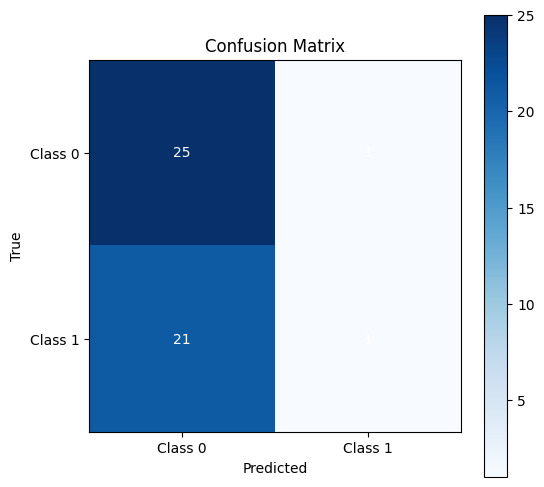

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Hyperparameter values for the number of trees (n_estimators) and max depth
n_estimators = [50, 100, 150]
max_depths = [10, 20, 30]

# Create empty lists to store the best hyperparameters
best_n_estimators = None
best_max_depth = None
best_log_loss = float('inf')

# Loop over hyperparameter values
for n in n_estimators:
    for depth in max_depths:
        print("n_estimators =", n, "max_depth =", depth)

        # Initialize the Random Forest Classifier with the current hyperparameters
        clf = RandomForestClassifier(n_estimators=n, max_depth=depth, random_state=42)
        clf.fit(X_train, y_train)

        # Calibrate the classifier
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(X_train, y_train)

        # Predict probabilities on the cross-validation data
        sig_clf_probs = sig_clf.predict_proba(X_val)

        # Calculate and append log loss to the list
        log_loss_val = log_loss(y_val, sig_clf_probs, labels=clf.classes_, eps=1e-15)
        print("Log Loss:", log_loss_val)

        # Check if this is the best set of hyperparameters
        if log_loss_val < best_log_loss:
            best_log_loss = log_loss_val
            best_n_estimators = n
            best_max_depth = depth

# Initialize the Random Forest Classifier with the best hyperparameters
clf = RandomForestClassifier(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
clf.fit(X_train, y_train)

# Calibrate the classifier
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

# Predict probabilities on the test data
predict_y = sig_clf.predict_proba(X_test)

# Get the predicted labels
y_test_pred = sig_clf.predict(X_test)

# Display the classification report for the test set
report = classification_report(y_test, y_test_pred)
print("Test Set Classification Report:\n", report)

# Calculate and display the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title("Confusion Matrix")
plt.colorbar()

# Create a list of class labels (replace '0' and '1' with your actual class labels)
classes = ['Class 0', 'Class 1']

tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes)
plt.yticks(tick_marks, classes)

plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), ha="center", va="center", color="white")

plt.show()


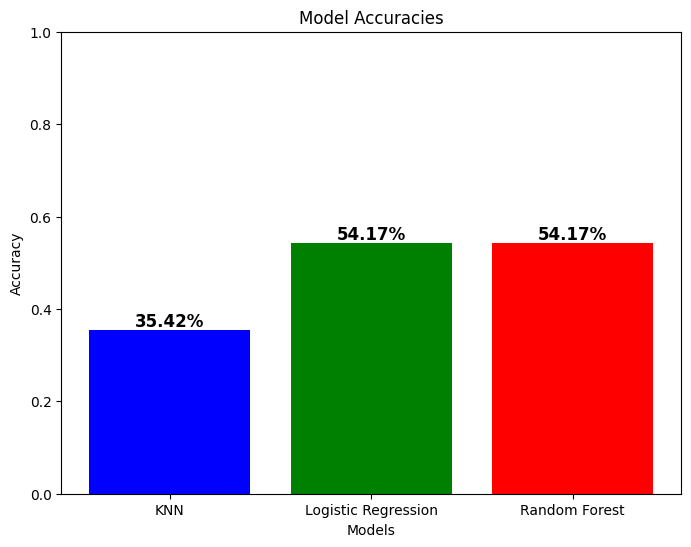

In [51]:
# we are getting approprate results using random forest and logestic regression
import matplotlib.pyplot as plt

# List of model names and their accuracies
model_names = ["KNN", "Logistic Regression", "Random Forest"]
accuracies = [0.3542, 0.5417, 0.5417]  # Replace these values with the actual accuracies

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Accuracies")
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 for accuracy

# Display the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc, f'{acc:.2%}', ha='center', va='bottom', fontsize=12, fontweight='bold', color='black')

plt.show()


In [52]:
from sklearn.linear_model import LogisticRegression
import joblib

# Assuming you have already trained your logistic regression model
# Create and train the logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Save the model to a file
model_filename = "logistic_regression_model.pkl"
joblib.dump(clf, model_filename)

# Now, you can load the model from the file when needed
loaded_model = joblib.load(model_filename)

# You can use the loaded_model to make predictions
y_pred = loaded_model.predict(X_test)


In [53]:
from sklearn.ensemble import RandomForestClassifier
from joblib import dump

# Assuming 'clf' is your trained Random Forest model
# You should replace 'clf' with your actual trained model

# Train the Random Forest model
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Example model creation

# Fit the model with your data (use your actual data)
clf.fit(X_train, y_train)  # Replace X_train and y_train with your actual training data

# Save the trained Random Forest model
dump(clf, 'random_forest_model.joblib')


['random_forest_model.joblib']